# Learning Implementation for Stochastic Linear Regression

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.random.seed = 100

# Observations:
* Reacts better to large bias than BatchGD
* Faster maybe


## Implementation

In [79]:
def single_update(i,X,y,y_,W,b,alpha):
    m,n = X.shape
    dJ_dW = np.zeros(n)
    for j in range(n):
        dJ_dW[j] += (y[i]-y_[i])*X[i][j]
    dJ_db = y[i]-y_[i]
    
    W += dJ_dW*alpha/m
    b += dJ_db/m
    return W,b

In [40]:
def SGD(X,y, iterations = 100,alpha = 0.000001):
    m,n = X.shape
    W = np.random.rand(n)
    b = np.random.rand()
    for k in range(iterations):
        for i in range(m):
            y_ = np.matmul(X,W) +b
            
            W,b = single_update(i,X,y,y_,W,b,alpha)
        print(f"Iteration {k}", f"Cost: {mean_squared_error(y,y_)}")
    return W,b

## Running Example

In [12]:
X = np.array([[x] for x in np.arange(1,100)])
y = np.array([ 10*x - 20*np.random.random() for x in range(1,100)])
W,b = SGD(X,y,500,0.0001)

99 1
Iteration 0 Cost: 172309.56141047447
[2.87111064] 672.1060568398685
Iteration 1 Cost: 94527.57713177988
[4.77634754] 482.5373669281017
Iteration 2 Cost: 53191.18873683561
[6.13733023] 347.12129030458544
Iteration 3 Cost: 30922.37926450871
[7.10953158] 250.3884710998883
Iteration 4 Cost: 18719.20935002535
[7.80401173] 181.28856402383542
Iteration 5 Cost: 11892.23936557461
[8.30010514] 131.9278899819148
Iteration 6 Cost: 7980.012947996314
[8.6544834] 96.66769579393895
Iteration 7 Cost: 5677.5438443833345
[8.90762918] 71.48000704564683
Iteration 8 Cost: 4283.953065810389
[9.08846078] 53.4874894463772
Iteration 9 Cost: 3416.6149022482414
[9.21763562] 40.63475441398941
Iteration 10 Cost: 2862.4379243513326
[9.30991009] 31.45356023694596
Iteration 11 Cost: 2499.9382571408805
[9.37582522] 24.895086394285073
Iteration 12 Cost: 2258.018983309471
[9.4229109] 20.210120766129876
Iteration 13 Cost: 2093.895894234616
[9.45654597] 16.86347283193689
Iteration 14 Cost: 1981.0903746262065
[9.480572

Iteration 150 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 151 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 152 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 153 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 154 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 155 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 156 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 157 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 158 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 159 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 160 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 161 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 162 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 163 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 164 Cost: 

Iteration 271 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 272 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 273 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 274 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 275 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 276 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 277 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 278 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 279 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 280 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 281 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 282 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 283 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 284 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 285 Cost: 

Iteration 396 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 397 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 398 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 399 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 400 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 401 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 402 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 403 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 404 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 405 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 406 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 407 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 408 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 409 Cost: 1715.1772841556096
[9.54065511] 8.494718203673642
Iteration 410 Cost: 

In [13]:
pred = np.matmul(X ,W) + b

In [14]:
from matplotlib import pyplot

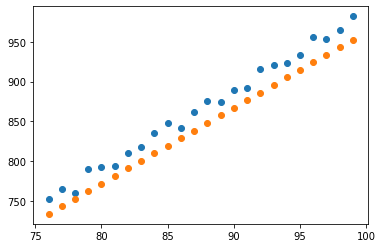

In [15]:
i = 75
j = 99
pyplot.scatter(X[i:j],y[i:j])
pyplot.scatter(X[i:j],pred[i:j])

## Test for dataset

In [17]:
from sklearn.datasets import load_boston

In [27]:
X = load_boston()["data"]
y = load_boston()["target"]
print(load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [103]:
X_selected = np.array([[x]for x in X[:,5]])[0:200]
y_selected = y[0:200]

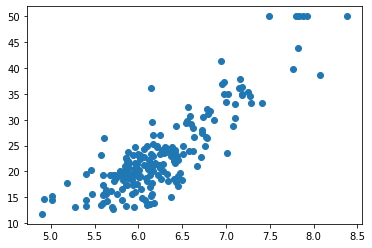

In [104]:
pyplot.scatter(X_selected,y_selected)


In [105]:
W,b = SGD(X_selected,y_selected,1000,0.0065)

Iteration 0 Cost: 70.14586213414614
Iteration 1 Cost: 51.38131899008065
Iteration 2 Cost: 51.22338835287084
Iteration 3 Cost: 51.51326693143479
Iteration 4 Cost: 51.540532390679665
Iteration 5 Cost: 51.46211114605067
Iteration 6 Cost: 51.351473213877355
Iteration 7 Cost: 51.231803839307766
Iteration 8 Cost: 51.10987050706913
Iteration 9 Cost: 50.98760796893225
Iteration 10 Cost: 50.865565423783934
Iteration 11 Cost: 50.74389771213639
Iteration 12 Cost: 50.6226476643884
Iteration 13 Cost: 50.50182631793842
Iteration 14 Cost: 50.381435690414385
Iteration 15 Cost: 50.26147524350023
Iteration 16 Cost: 50.141943717473225
Iteration 17 Cost: 50.022839651855705
Iteration 18 Cost: 49.90416153316839
Iteration 19 Cost: 49.785907836849965
Iteration 20 Cost: 49.66807703914035
Iteration 21 Cost: 49.55066762043887
Iteration 22 Cost: 49.433678066243246
Iteration 23 Cost: 49.31710686740198
Iteration 24 Cost: 49.20095252017183
Iteration 25 Cost: 49.085213526220166
Iteration 26 Cost: 48.96988839261156
It

Iteration 232 Cost: 32.19078917532432
Iteration 233 Cost: 32.13576015546418
Iteration 234 Cost: 32.080926993758986
Iteration 235 Cost: 32.02628898789928
Iteration 236 Cost: 31.97184543810342
Iteration 237 Cost: 31.91759564710864
Iteration 238 Cost: 31.863538920161947
Iteration 239 Cost: 31.80967456501092
Iteration 240 Cost: 31.756001891894858
Iteration 241 Cost: 31.702520213535667
Iteration 242 Cost: 31.649228845129045
Iteration 243 Cost: 31.59612710433541
Iteration 244 Cost: 31.543214311271132
Iteration 245 Cost: 31.49048978849958
Iteration 246 Cost: 31.43795286102241
Iteration 247 Cost: 31.385602856270562
Iteration 248 Cost: 31.333439104095824
Iteration 249 Cost: 31.281460936761775
Iteration 250 Cost: 31.229667688935425
Iteration 251 Cost: 31.178058697678107
Iteration 252 Cost: 31.126633302437302
Iteration 253 Cost: 31.075390845037667
Iteration 254 Cost: 31.024330669672764
Iteration 255 Cost: 30.973452122896262
Iteration 256 Cost: 30.92275455361365
Iteration 257 Cost: 30.872237313073

Iteration 454 Cost: 23.729954007201833
Iteration 455 Cost: 23.70495154868237
Iteration 456 Cost: 23.68003743871256
Iteration 457 Cost: 23.655211361665916
Iteration 458 Cost: 23.6304730030499
Iteration 459 Cost: 23.60582204950176
Iteration 460 Cost: 23.581258188784656
Iteration 461 Cost: 23.556781109783355
Iteration 462 Cost: 23.532390502500377
Iteration 463 Cost: 23.508086058051795
Iteration 464 Cost: 23.48386746866348
Iteration 465 Cost: 23.459734427666877
Iteration 466 Cost: 23.43568662949493
Iteration 467 Cost: 23.41172376967862
Iteration 468 Cost: 23.387845544842392
Iteration 469 Cost: 23.364051652700642
Iteration 470 Cost: 23.3403417920536
Iteration 471 Cost: 23.3167156627834
Iteration 472 Cost: 23.293172965850264
Iteration 473 Cost: 23.26971340328864
Iteration 474 Cost: 23.246336678203296
Iteration 475 Cost: 23.223042494765377
Iteration 476 Cost: 23.19983055820868
Iteration 477 Cost: 23.17670057482576
Iteration 478 Cost: 23.1536522519642
Iteration 479 Cost: 23.130685298022737
Ite

Iteration 678 Cost: 19.852253505884963
Iteration 679 Cost: 19.840895016518033
Iteration 680 Cost: 19.82957624013271
Iteration 681 Cost: 19.818297035636355
Iteration 682 Cost: 19.807057262441923
Iteration 683 Cost: 19.79585678046617
Iteration 684 Cost: 19.784695450127547
Iteration 685 Cost: 19.773573132344517
Iteration 686 Cost: 19.762489688533883
Iteration 687 Cost: 19.75144498060878
Iteration 688 Cost: 19.740438870977076
Iteration 689 Cost: 19.729471222539402
Iteration 690 Cost: 19.71854189868761
Iteration 691 Cost: 19.707650763302873
Iteration 692 Cost: 19.69679768075381
Iteration 693 Cost: 19.685982515894974
Iteration 694 Cost: 19.67520513406498
Iteration 695 Cost: 19.66446540108473
Iteration 696 Cost: 19.653763183255823
Iteration 697 Cost: 19.64309834735848
Iteration 698 Cost: 19.632470760650317
Iteration 699 Cost: 19.621880290864304
Iteration 700 Cost: 19.611326806207064
Iteration 701 Cost: 19.60081017535738
Iteration 702 Cost: 19.59033026746413
Iteration 703 Cost: 19.579886952145

Iteration 907 Cost: 18.057580398619795
Iteration 908 Cost: 18.05245728854058
Iteration 909 Cost: 18.047351811956172
Iteration 910 Cost: 18.04226390673863
Iteration 911 Cost: 18.03719351098174
Iteration 912 Cost: 18.032140563000358
Iteration 913 Cost: 18.027105001329016
Iteration 914 Cost: 18.02208676472164
Iteration 915 Cost: 18.017085792150755
Iteration 916 Cost: 18.012102022806253
Iteration 917 Cost: 18.007135396095176
Iteration 918 Cost: 18.00218585164039
Iteration 919 Cost: 17.997253329280465
Iteration 920 Cost: 17.99233776906813
Iteration 921 Cost: 17.987439111270245
Iteration 922 Cost: 17.982557296366405
Iteration 923 Cost: 17.977692265048724
Iteration 924 Cost: 17.9728439582206
Iteration 925 Cost: 17.9680123169963
Iteration 926 Cost: 17.963197282700033
Iteration 927 Cost: 17.958398796865303
Iteration 928 Cost: 17.953616801233746
Iteration 929 Cost: 17.948851237755257
Iteration 930 Cost: 17.944102048586288
Iteration 931 Cost: 17.939369176089702
Iteration 932 Cost: 17.934652562833

In [106]:
pred = np.dot(X_selected,W) + b

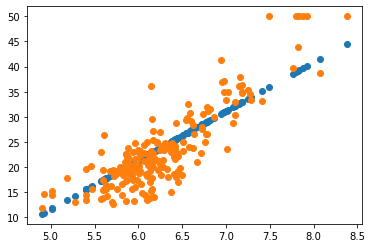

In [107]:
pyplot.scatter(X_selected, pred)
pyplot.scatter(X_selected, y_selected)

In [108]:
W,b

(array([9.75208499]), -37.12005160366216)